In [1]:
#Listing 3.1 – Importing necessary packages

#Import required libraries
import torch as tch
import torch.nn as nn

import numpy as np

from sklearn.datasets import make_blobs
from matplotlib import pyplot


In [2]:
#Listing 3.2 – Creating a toy dataset

samples = 5000

#Let’s divide the toy dataset into training (80%) and rest for validation.
train_split = int(samples*0.8)

#Create a dummy classification dataset
X, y = make_blobs(n_samples=samples, centers=2, n_features=64, cluster_std=10, random_state=2020)
y = y.reshape(-1,1)

#Convert the numpy datasets to Torch Tensors
X,y = tch.from_numpy(X),tch.from_numpy(y)
X,y =X.float(),y.float()

#Split the datasets inot train and test(validation)
X_train, x_test = X[:train_split], X[train_split:]
Y_train, y_test = y[:train_split], y[train_split:]

#Print shapes of each dataset
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)
print("X.dtype",X.dtype)
print("y.dtype",y.dtype)



X_train.shape: torch.Size([4000, 64])
x_test.shape: torch.Size([1000, 64])
Y_train.shape: torch.Size([4000, 1])
y_test.shape: torch.Size([1000, 1])
X.dtype torch.float32
y.dtype torch.float32


In [3]:
#Listing 3.3 – Define a feed forward neural network


#Define a neural network with 3 hidden layers and 1 output layer
#Hidden Layers will have 64,256 and 1024 neurons
#Output layers will have 1 neuron

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(64, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 1024)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(1024, 1)
        self.final = nn.Sigmoid()
        
    def forward(self, x):
        op = self.fc1(x)
        op = self.relu1(op)        
        op = self.fc2(op)
        op = self.relu2(op)
        op = self.out(op)
        y = self.final(op)
        return y


In [4]:
#Listing 3.4 –Define loss, optimizer and Training function for  neural network

#Define function for training a network
def train_network(model,optimizer,loss_function \
,num_epochs,batch_size,X_train,Y_train):
    #Explicitly start model training
    model.train()

    loss_across_epochs = []
    for epoch in range(num_epochs):
        train_loss= 0.0


        for i in range(0,X_train.shape[0],batch_size):

            #Extract train batch from X and Y
            input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
            labels = Y_train[i:min(X_train.shape[0],i+batch_size)]

            #set the gradients to zero before starting to do backpropragation 
            optimizer.zero_grad()

            #Forward pass
            output_data  = model(input_data)

            #Caculate loss
            loss = loss_function(output_data, labels)

            #Backpropogate
            loss.backward()

            #Update weights
            optimizer.step()

            train_loss += loss.item() * batch_size

        print("Epoch: {} - Loss:{:.4f}".format(epoch+1,train_loss ))
        loss_across_epochs.extend([train_loss])        

    #Predict
    y_test_pred = model(x_test)
    a =np.where(y_test_pred>0.5,1,0)
    return(loss_across_epochs)
###------------END OF FUNCTION--------------

#Create an object of the Neural Network class
model = NeuralNetwork()

#Define loss function
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

#Define Optimizer
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001)

#Define epochs and batch size
num_epochs = 10
batch_size=16


#Calling the function for training and pass model, optimizer, loss and related paramters
adam_loss = train_network(model,adam_optimizer \
,loss_function,num_epochs,batch_size,X_train,Y_train)



Epoch: 1 - Loss:106.7566
Epoch: 2 - Loss:11.5689
Epoch: 3 - Loss:7.8169
Epoch: 4 - Loss:0.2327
Epoch: 5 - Loss:0.0313
Epoch: 6 - Loss:0.0034
Epoch: 7 - Loss:0.0019
Epoch: 8 - Loss:0.0012
Epoch: 9 - Loss:0.0009
Epoch: 10 - Loss:0.0007


RMSProp...
Epoch: 1 - Loss:5794.6734
Epoch: 2 - Loss:1680.3092
Epoch: 3 - Loss:1169.5457
Epoch: 4 - Loss:1518.7088
Epoch: 5 - Loss:1727.5753
Epoch: 6 - Loss:661.7122
Epoch: 7 - Loss:532.6023
Epoch: 8 - Loss:2613.1597
Epoch: 9 - Loss:283.5713
Epoch: 10 - Loss:1058.1581
Adam...
Epoch: 1 - Loss:106.7566
Epoch: 2 - Loss:11.5689
Epoch: 3 - Loss:7.8169
Epoch: 4 - Loss:0.2327
Epoch: 5 - Loss:0.0313
Epoch: 6 - Loss:0.0034
Epoch: 7 - Loss:0.0019
Epoch: 8 - Loss:0.0012
Epoch: 9 - Loss:0.0009
Epoch: 10 - Loss:0.0007
SGD...
Epoch: 1 - Loss:801.0526
Epoch: 2 - Loss:131.7263
Epoch: 3 - Loss:296.2784
Epoch: 4 - Loss:240.0572
Epoch: 5 - Loss:248.2811
Epoch: 6 - Loss:248.2784
Epoch: 7 - Loss:248.2759
Epoch: 8 - Loss:248.2733
Epoch: 9 - Loss:248.2708
Epoch: 10 - Loss:248.2684


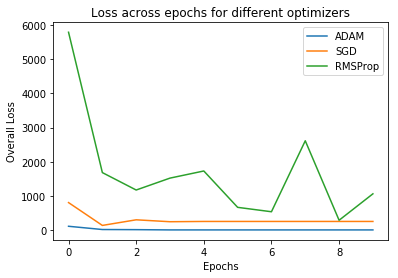

In [5]:
#Listing 3.5 –Train model with various optimizers


#Define loss function
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss
num_epochs = 10
batch_size=16

#Define a model object from the class defined earlier
model = NeuralNetwork()

#Train network using RMSProp optimizer
rmsprp_optimizer = tch.optim.RMSprop(model.parameters()
, lr=0.01, alpha=0.9
, eps=1e-08, weight_decay=0.1
, momentum=0.1, centered=True)
print("RMSProp...")
rmsprop_loss = train_network(model,rmsprp_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train)




#Train network using Adam optimizer

model = NeuralNetwork()
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001)
print("Adam...")
adam_loss = train_network(model,adam_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train)

#Train network using SGD optimizer

model = NeuralNetwork()
sgd_optimizer = tch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("SGD...")
sgd_loss = train_network(model,sgd_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train) 

#Plot the losses for each optimizer across epochs
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(0,10)

ax = plt.subplot(111)
ax.plot(adam_loss,label="ADAM")
ax.plot(sgd_loss,label="SGD")
ax.plot(rmsprop_loss,label="RMSProp")
ax.legend()
plt.xlabel("Epochs")
plt.ylabel("Overall Loss")
plt.title("Loss across epochs for different optimizers")
plt.show()

